# Point operations

Point operations operate on individual pixels of an image.  In this lab we will explore various point operations such as multiplying or dividing by a scalar and thresholding.

In [195]:
import imageio
import numpy as np
from matplotlib import pyplot as plt
import skimage

/var/folders/cn/043rpj9s7gn508l3jykd91gh0000gn/T/ipykernel_35273/3454105921.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('love_and_peace.jpg')


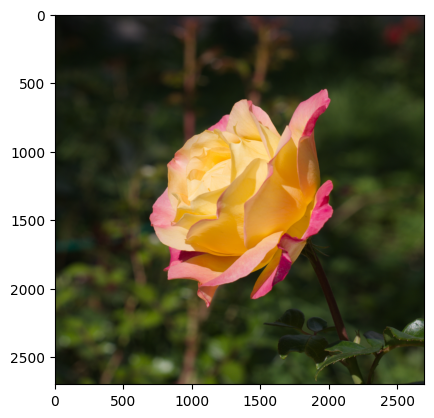

In [196]:
im = imageio.imread('love_and_peace.jpg')
plt.imshow(im)

Here's an example of a simple point operation: converting to floating point and remapping the data range from [0 255] to [0 1].

In [197]:
im = im.astype('float32')/255

Let's look at the individual channels of the image.

This code cells demonstrates some other useful skills such as making subplots and the use of `zip`.  

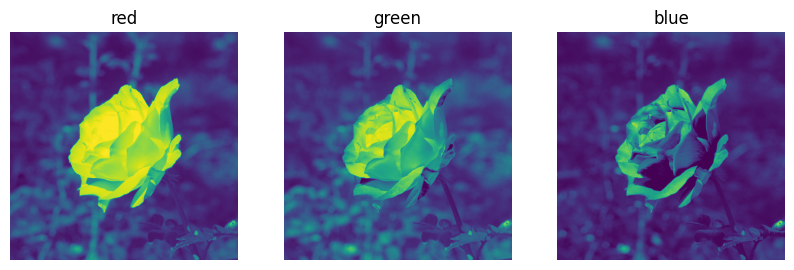

In [198]:
fig,axes = plt.subplots(1,3,figsize=(10,20))

channels = ['red','green','blue']
for i,(ax,channel) in enumerate(zip(axes,channels)):
    ax.imshow(im[...,i])
    ax.axis('off')
    ax.set_title(channel)

A histogram is shows the distribution of values in an array.

Note the use of `.flatten()` here.  `flatten` converts an array of any shape into a one-dimensional list.

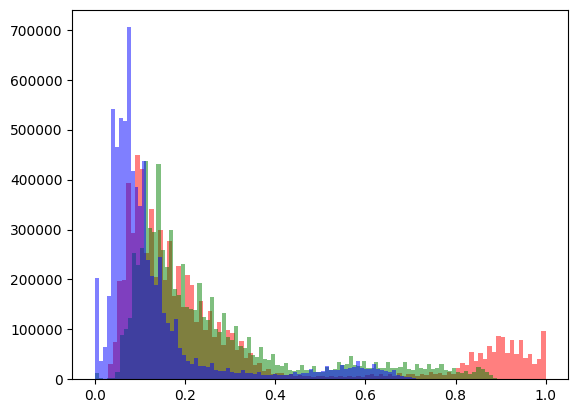

In [199]:
for i,channel in enumerate(channels):
    plt.hist(im[:,:,i].flatten(),bins=100,color=channel,alpha=0.5)
plt.show()

Let's try to change the color of the flower by increasing its red values and decreasing its blue and green values.

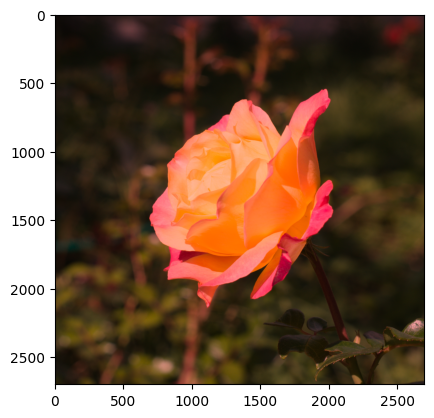

In [200]:
newim = im.copy()
newim[...,0] *= 1.25
newim[...,1] /= 1.25
newim[...,2] /= 1.25
newim = np.clip(newim,0,1)
plt.imshow(newim)

When we do this, it changes the color of the background as well as the flower.  How can we change just the color of the flower?

Another simple point operation is to binarize the image by thresholding.  Here we will make a binary mask by thresholding the red channel at 0.5.

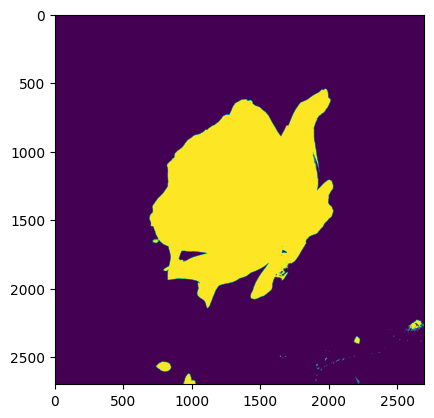

In [201]:
mask = im[...,0]>0.5
plt.imshow(mask)

In NumPy we can use a Boolean mask to select elements of an array, as shown here.

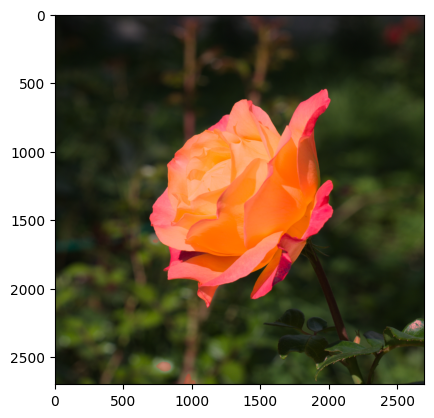

In [202]:
newim = im.copy()
newim[mask,0] *= 1.25
newim[mask,1] /= 1.25
newim[mask,2] /= 1.25
newim = np.clip(newim,0,1)
plt.imshow(newim)

Here we reduce the red and increase the blue and green.

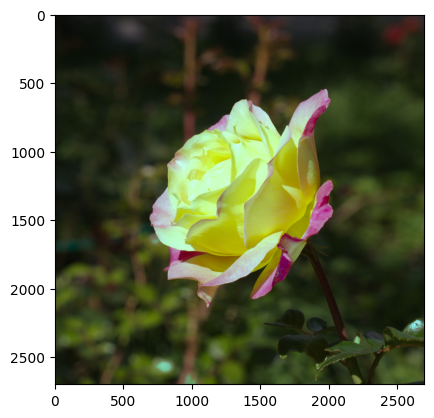

In [203]:
newim2 = im.copy()
newim2[mask,0] /= 1.25
newim2[mask,1] *= 1.25
newim2[mask,2] *= 1.25
newim2 = np.clip(newim2,0,1)
plt.imshow(newim2)